In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
data=pd.read_csv("delhivery_data.txt")

In [4]:
data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ...            cutoff_timestamp  \
0  2018-09-20 03:21:32.418600  ...         2018-09-20 04:27:55   
1  2018-09-20 03:21:32.418600  ...         2018-09-20 04:17:55   
2  2018-09-20 03:21:32.418600  ...  2018-09-20 04:01:19.505586   
3  2018-09-20 03:21:32.418600  ...         2018-09-20 03:39:57   
4  2018-09-20 03:21:32.418600  ...         2018-09-20 03:33:55   

   actual_distance_to_destination  actual_time  osrm_time osrm_distance  \
0                       10.435660         14.0       11.0       11.9653   
1                       18.936842         24.0       20.0       21.7243   
2                       27.637279         40.0       28.0       32.5395   
3                       36.118028         62.0       40.0       45.5620   
4                       39.386040         68.0       44.0       54.2181   

     factor  segment_actual_time  segment_osrm_time  segment_osrm_distance  \
0  1.272727                 14.0               11.0                11.9653   
1  1.200000                 10.0                9.0                 9.7590   
2  1.428571                 16.0                7.0                10.8152   
3  1.550000                 21.0               12.0                13.0224   
4  1.545455                  6.0                5.0                 3.9153   

   segment_factor  
0        1.272727  
1        1.111111  
2        2.285714  
3        1.750000  
4        1.200000  

[5 rows x 24 columns]

Problem Statement :
> Delhivery is the largest and fastest-growing company, aiming to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

> In order to be ahead of the competitors, they need to build intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business.

> So, understanding the data around the shipment details like, time taken for delivery vs expected days and finding the gaps for effecient delivery for low performing cities and can help them be ahead in the game.

In [5]:
data.shape

(144867, 24)

> The data as around 1.4 millions of record and 24 features. Considering all features and doing analysis can be a bit tidy. So, we can use feature engineering to analyze and combine multiple feature and drop unwanted features to do the analysis.

In [6]:
data.describe()

start_scan_to_end_scan  cutoff_factor  actual_distance_to_destination  \
count           144867.000000  144867.000000                   144867.000000   
mean               961.262986     232.926567                      234.073372   
std               1037.012769     344.755577                      344.990009   
min                 20.000000       9.000000                        9.000045   
25%                161.000000      22.000000                       23.355874   
50%                449.000000      66.000000                       66.126571   
75%               1634.000000     286.000000                      286.708875   
max               7898.000000    1927.000000                     1927.447705   

         actual_time      osrm_time  osrm_distance         factor  \
count  144867.000000  144867.000000  144867.000000  144867.000000   
mean      416.927527     213.868272     284.771297       2.120107   
std       598.103621     308.011085     421.119294       1.715421   
min         9.000000       6.000000       9.008200       0.144000   
25%        51.000000      27.000000      29.914700       1.604264   
50%       132.000000      64.000000      78.525800       1.857143   
75%       513.000000     257.000000     343.193250       2.213483   
max      4532.000000    1686.000000    2326.199100      77.387097   

       segment_actual_time  segment_osrm_time  segment_osrm_distance  \
count        144867.000000      144867.000000           144867.00000   
mean             36.196111          18.507548               22.82902   
std              53.571158          14.775960               17.86066   
min            -244.000000           0.000000                0.00000   
25%              20.000000          11.000000               12.07010   
50%              29.000000          17.000000               23.51300   
75%              40.000000          22.000000               27.81325   
max            3051.000000        1611.000000             2191.40370   

       segment_factor  
count   144867.000000  
mean         2.218368  
std          4.847530  
min        -23.444444  
25%          1.347826  
50%          1.684211  
75%          2.250000  
max        574.250000

> Above is the decriptive analysis for the numerical values for the data. If we observe the columns related to distance and time, the standard deviation is quite high and even more for some in compare to the mean value. That implies, the data has outliers for those columns.So, we can relay on median values, which is 50% data in the above calculated values to understand the central limlit theorem.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

> Not many columns have missing values. We can check for those columns separately and data type for each columns looks good other than time related columns with timestamp. We can convert those values to timestamp data type.

In [8]:
# Creating new Features with Source & Destination - States & City details

data['Source_State']=[str(i).split('(')[-1][:-1] for i in data['source_name']]
data['Source_City']=[str(i).split('(')[0] for i in data['source_name']]
data['Destination_State']=[str(i).split('(')[-1][:-1] for i in data['destination_name']]
data['Destination_City']=[str(i).split('(')[0] for i in data['destination_name']]
data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time  ... osrm_distance    factor  \
0  2018-09-20 03:21:32.418600  ...       11.9653  1.272727   
1  2018-09-20 03:21:32.418600  ...       21.7243  1.200000   
2  2018-09-20 03:21:32.418600  ...       32.5395  1.428571   
3  2018-09-20 03:21:32.418600  ...       45.5620  1.550000   
4  2018-09-20 03:21:32.418600  ...       54.2181  1.545455   

   segment_actual_time  segment_osrm_time segment_osrm_distance  \
0                 14.0               11.0               11.9653   
1                 10.0                9.0                9.7590   
2                 16.0                7.0               10.8152   
3                 21.0               12.0               13.0224   
4                  6.0                5.0                3.9153   

   segment_factor  Source_State        Source_City  Destination_State  \
0        1.272727       Gujarat  Anand_VUNagar_DC             Gujarat   
1        1.111111       Gujarat  Anand_VUNagar_DC             Gujarat   
2        2.285714       Gujarat  Anand_VUNagar_DC             Gujarat   
3        1.750000       Gujarat  Anand_VUNagar_DC             Gujarat   
4        1.200000       Gujarat  Anand_VUNagar_DC             Gujarat   

       Destination_City  
0  Khambhat_MotvdDPP_D   
1  Khambhat_MotvdDPP_D   
2  Khambhat_MotvdDPP_D   
3  Khambhat_MotvdDPP_D   
4  Khambhat_MotvdDPP_D   

[5 rows x 28 columns]

In [9]:
# Grouped data to analyse the data for each corridor/region for the delievery

agg_func={'data':'count',
         'Source_State':'max','Source_City':'max','Destination_State':'max','Destination_City':'max',
         'segment_actual_time':'mean','segment_osrm_time':'mean','segment_osrm_distance':'mean'}
data1=data.groupby(['trip_uuid','source_center','destination_center']).agg(agg_func)
data1['segment_time_delay']=data1['segment_actual_time']-data1['segment_osrm_time']
data1

data  \
trip_uuid               source_center destination_center         
trip-153671041653548748 IND209304AAA  IND000000ACB          18   
                        IND462022AAA  IND209304AAA          21   
trip-153671042288605164 IND561203AAB  IND562101AAA           3   
                        IND572101AAA  IND561203AAB           6   
trip-153671043369099517 IND000000ACB  IND160002AAC          12   
...                                                        ...   
trip-153861115439069069 IND628204AAA  IND627657AAA           4   
                        IND628613AAA  IND627005AAA           4   
                        IND628801AAA  IND628204AAA           2   
trip-153861118270144424 IND583119AAA  IND583101AAA           2   
                        IND583201AAA  IND583119AAA           2   

                                                            Source_State  \
trip_uuid               source_center destination_center                   
trip-153671041653548748 IND209304AAA  IND000000ACB         Uttar Pradesh   
                        IND462022AAA  IND209304AAA        Madhya Pradesh   
trip-153671042288605164 IND561203AAB  IND562101AAA             Karnataka   
                        IND572101AAA  IND561203AAB             Karnataka   
trip-153671043369099517 IND000000ACB  IND160002AAC               Haryana   
...                                                                  ...   
trip-153861115439069069 IND628204AAA  IND627657AAA            Tamil Nadu   
                        IND628613AAA  IND627005AAA            Tamil Nadu   
                        IND628801AAA  IND628204AAA            Tamil Nadu   
trip-153861118270144424 IND583119AAA  IND583101AAA             Karnataka   
                        IND583201AAA  IND583119AAA             Karnataka   

                                                                     Source_City  \
trip_uuid               source_center destination_center                           
trip-153671041653548748 IND209304AAA  IND000000ACB           Kanpur_Central_H_6    
                        IND462022AAA  IND209304AAA            Bhopal_Trnsport_H    
trip-153671042288605164 IND561203AAB  IND562101AAA        Doddablpur_ChikaDPP_D    
                        IND572101AAA  IND561203AAB            Tumkur_Veersagr_I    
trip-153671043369099517 IND000000ACB  IND160002AAC          Gurgaon_Bilaspur_HB    
...                                                                          ...   
trip-153861115439069069 IND628204AAA  IND627657AAA        Tirchchndr_Shnmgprm_D    
                        IND628613AAA  IND627005AAA         Peikulam_SriVnktpm_D    
                        IND628801AAA  IND628204AAA              Eral_Busstand_D    
trip-153861118270144424 IND583119AAA  IND583101AAA            Sandur_WrdN1DPP_D    
                        IND583201AAA  IND583119AAA                       Hospet    

                                                         Destination_State  \
trip_uuid               source_center destination_center                     
trip-153671041653548748 IND209304AAA  IND000000ACB                 Haryana   
                        IND462022AAA  IND209304AAA           Uttar Pradesh   
trip-153671042288605164 IND561203AAB  IND562101AAA               Karnataka   
                        IND572101AAA  IND561203AAB               Karnataka   
trip-153671043369099517 IND000000ACB  IND160002AAC                  Punjab   
...                                                                    ...   
trip-153861115439069069 IND628204AAA  IND627657AAA              Tamil Nadu   
                        IND628613AAA  IND627005AAA              Tamil Nadu   
                        IND628801AAA  IND628204AAA              Tamil Nadu   
trip-153861118270144424 IND583119AAA  IND583101AAA               Karnataka   
                        IND583201AAA  IND583119AAA               Karnataka   

                                                                   Destination_City  \
trip_uuid      

In [10]:
# Top 5 corridors with most orders

data1.sort_values('data',ascending=False).head(5)[['Source_State','Source_City','Destination_State','Destination_City','data']]

Source_State  \
trip_uuid               source_center destination_center                
trip-153755502932196495 IND160002AAC  IND562132AAA             Punjab   
trip-153854253003897121 IND000000ACB  IND600056AAB            Haryana   
trip-153837097390448401 IND000000ACB  IND600056AAB            Haryana   
trip-153828700829921150 IND000000ACB  IND600056AAB            Haryana   
trip-153681464570847135 IND000000ACB  IND600056AAB            Haryana   

                                                                     Source_City  \
trip_uuid               source_center destination_center                           
trip-153755502932196495 IND160002AAC  IND562132AAA        Chandigarh_Mehmdpur_H    
trip-153854253003897121 IND000000ACB  IND600056AAB          Gurgaon_Bilaspur_HB    
trip-153837097390448401 IND000000ACB  IND600056AAB          Gurgaon_Bilaspur_HB    
trip-153828700829921150 IND000000ACB  IND600056AAB          Gurgaon_Bilaspur_HB    
trip-153681464570847135 IND000000ACB  IND600056AAB          Gurgaon_Bilaspur_HB    

                                                         Destination_State  \
trip_uuid               source_center destination_center                     
trip-153755502932196495 IND160002AAC  IND562132AAA               Karnataka   
trip-153854253003897121 IND000000ACB  IND600056AAB              Tamil Nadu   
trip-153837097390448401 IND000000ACB  IND600056AAB              Tamil Nadu   
trip-153828700829921150 IND000000ACB  IND600056AAB              Tamil Nadu   
trip-153681464570847135 IND000000ACB  IND600056AAB              Tamil Nadu   

                                                               Destination_City  \
trip_uuid               source_center destination_center                          
trip-153755502932196495 IND160002AAC  IND562132AAA        Bangalore_Nelmngla_H    
trip-153854253003897121 IND000000ACB  IND600056AAB          MAA_Poonamallee_HB    
trip-153837097390448401 IND000000ACB  IND600056AAB          MAA_Poonamallee_HB    
trip-153828700829921150 IND000000ACB  IND600056AAB          MAA_Poonamallee_HB    
trip-153681464570847135 IND000000ACB  IND600056AAB          MAA_Poonamallee_HB    

                                                          data  
trip_uuid               source_center destination_center        
trip-153755502932196495 IND160002AAC  IND562132AAA          81  
trip-153854253003897121 IND000000ACB  IND600056AAB          79  
trip-153837097390448401 IND000000ACB  IND600056AAB          79  
trip-153828700829921150 IND000000ACB  IND600056AAB          79  
trip-153681464570847135 IND000000ACB  IND600056AAB          79

> There has been most delivery movement between Punjab (Chandigarh_Mehmdpur_H) & Karnataka (Bangalore_Nelmngla_H)

In [11]:
# Top 5 corridors with highest average distance

data1.sort_values('segment_osrm_distance',ascending=False).head(5)[['Source_State','Source_City','Destination_State','Destination_City','segment_osrm_distance']]

Source_State  \
trip_uuid               source_center destination_center                
trip-153733174477629450 IND000000ACB  IND600056AAB            Haryana   
trip-153759174280800288 IND562132AAA  IND462022AAA          Karnataka   
trip-153705652749826759 IND110037AAM  IND421302AAG              Delhi   
trip-153757673070653230 IND110037AAM  IND421302AAG              Delhi   
trip-153707293708383893 IND000000ACB  IND842001AAA            Haryana   

                                                                    Source_City  \
trip_uuid               source_center destination_center                          
trip-153733174477629450 IND000000ACB  IND600056AAB         Gurgaon_Bilaspur_HB    
trip-153759174280800288 IND562132AAA  IND462022AAA        Bangalore_Nelmngla_H    
trip-153705652749826759 IND110037AAM  IND421302AAG             Delhi_Airport_H    
trip-153757673070653230 IND110037AAM  IND421302AAG             Delhi_Airport_H    
trip-153707293708383893 IND000000ACB  IND842001AAA         Gurgaon_Bilaspur_HB    

                                                         Destination_State  \
trip_uuid               source_center destination_center                     
trip-153733174477629450 IND000000ACB  IND600056AAB              Tamil Nadu   
trip-153759174280800288 IND562132AAA  IND462022AAA          Madhya Pradesh   
trip-153705652749826759 IND110037AAM  IND421302AAG             Maharashtra   
trip-153757673070653230 IND110037AAM  IND421302AAG             Maharashtra   
trip-153707293708383893 IND000000ACB  IND842001AAA                   Bihar   

                                                              Destination_City  \
trip_uuid               source_center destination_center                         
trip-153733174477629450 IND000000ACB  IND600056AAB         MAA_Poonamallee_HB    
trip-153759174280800288 IND562132AAA  IND462022AAA          Bhopal_Trnsport_H    
trip-153705652749826759 IND110037AAM  IND421302AAG        Bhiwandi_Mankoli_HB    
trip-153757673070653230 IND110037AAM  IND421302AAG        Bhiwandi_Mankoli_HB    
trip-153707293708383893 IND000000ACB  IND842001AAA        Muzaffrpur_Bbganj_I    

                                                          segment_osrm_distance  
trip_uuid               source_center destination_center                         
trip-153733174477629450 IND000000ACB  IND600056AAB                    2191.4037  
trip-153759174280800288 IND562132AAA  IND462022AAA                    1394.5914  
trip-153705652749826759 IND110037AAM  IND421302AAG                    1367.5928  
trip-153757673070653230 IND110037AAM  IND421302AAG                    1367.0419  
trip-153707293708383893 IND000000ACB  IND842001AAA                     995.1636

> Highest average distance travelled for the delievery is between Haryana (Gurgaon_Bilaspur_HB) & Tamil Nadu (MAA_Poonamallee_HB)

In [12]:
# Top 5 corridors with highest average time taken

data1.sort_values('segment_actual_time',ascending=False).head(5)[['Source_State','Source_City','Destination_State','Destination_City','segment_actual_time']]

Source_State  \
trip_uuid               source_center destination_center                     
trip-153733174477629450 IND000000ACB  IND600056AAB                 Haryana   
trip-153759174280800288 IND562132AAA  IND462022AAA               Karnataka   
trip-153843695443252828 IND764071AAB  IND530012AAA                  Orissa   
trip-153768779707932330 IND176303AAA  IND176310AAA        Himachal Pradesh   
trip-153757673070653230 IND110037AAM  IND421302AAG                   Delhi   

                                                                          Source_City  \
trip_uuid               source_center destination_center                                
trip-153733174477629450 IND000000ACB  IND600056AAB               Gurgaon_Bilaspur_HB    
trip-153759174280800288 IND562132AAA  IND462022AAA              Bangalore_Nelmngla_H    
trip-153843695443252828 IND764071AAB  IND530012AAA        Pappadahandi_Central_DPP_2    
trip-153768779707932330 IND176303AAA  IND176310AAA              Dalhousie_Banikhet_D    
trip-153757673070653230 IND110037AAM  IND421302AAG                   Delhi_Airport_H    

                                                         Destination_State  \
trip_uuid               source_center destination_center                     
trip-153733174477629450 IND000000ACB  IND600056AAB              Tamil Nadu   
trip-153759174280800288 IND562132AAA  IND462022AAA          Madhya Pradesh   
trip-153843695443252828 IND764071AAB  IND530012AAA          Andhra Pradesh   
trip-153768779707932330 IND176303AAA  IND176310AAA        Himachal Pradesh   
trip-153757673070653230 IND110037AAM  IND421302AAG             Maharashtra   

                                                                    Destination_City  \
trip_uuid               source_center destination_center                               
trip-153733174477629450 IND000000ACB  IND600056AAB               MAA_Poonamallee_HB    
trip-153759174280800288 IND562132AAA  IND462022AAA                Bhopal_Trnsport_H    
trip-153843695443252828 IND764071AAB  IND530012AAA        Visakhapatnam_Gajuwaka_IP    
trip-153768779707932330 IND176303AAA  IND176310AAA                 Chamba_Bangotu_D    
trip-153757673070653230 IND110037AAM  IND421302AAG              Bhiwandi_Mankoli_HB    

                                                          segment_actual_time  
trip_uuid               source_center destination_center                       
trip-153733174477629450 IND000000ACB  IND600056AAB                     3051.0  
trip-153759174280800288 IND562132AAA  IND462022AAA                     2625.0  
trip-153843695443252828 IND764071AAB  IND530012AAA                     2541.0  
trip-153768779707932330 IND176303AAA  IND176310AAA                     2491.0  
trip-153757673070653230 IND110037AAM  IND421302AAG                     2464.0

> Highest average time travelled for the delievery is between Haryana (Gurgaon_Bilaspur_HB) & Tamil Nadu (MAA_Poonamallee_HB)

In [13]:
# Top 5 corridors with highest average time delay (busy)

data1.sort_values('segment_time_delay',ascending=False).head(5)[['Source_State','Source_City','Destination_State','Destination_City','segment_time_delay']]

Source_State  \
trip_uuid               source_center destination_center                     
trip-153768779707932330 IND176303AAA  IND176310AAA        Himachal Pradesh   
trip-153843695443252828 IND764071AAB  IND530012AAA                  Orissa   
trip-153821802957864106 IND473331AAA  IND473226AAA          Madhya Pradesh   
trip-153744173223326815 IND796321AAB  IND796009AAA                 Mizoram   
trip-153759174280800288 IND562132AAA  IND462022AAA               Karnataka   

                                                                          Source_City  \
trip_uuid               source_center destination_center                                
trip-153768779707932330 IND176303AAA  IND176310AAA              Dalhousie_Banikhet_D    
trip-153843695443252828 IND764071AAB  IND530012AAA        Pappadahandi_Central_DPP_2    
trip-153821802957864106 IND473331AAA  IND473226AAA               Ashokngr_Bypassrd_D    
trip-153744173223326815 IND796321AAB  IND796009AAA               Champhai_AwmpiVng_D    
trip-153759174280800288 IND562132AAA  IND462022AAA              Bangalore_Nelmngla_H    

                                                         Destination_State  \
trip_uuid               source_center destination_center                     
trip-153768779707932330 IND176303AAA  IND176310AAA        Himachal Pradesh   
trip-153843695443252828 IND764071AAB  IND530012AAA          Andhra Pradesh   
trip-153821802957864106 IND473331AAA  IND473226AAA          Madhya Pradesh   
trip-153744173223326815 IND796321AAB  IND796009AAA                 Mizoram   
trip-153759174280800288 IND562132AAA  IND462022AAA          Madhya Pradesh   

                                                                    Destination_City  \
trip_uuid               source_center destination_center                               
trip-153768779707932330 IND176303AAA  IND176310AAA                 Chamba_Bangotu_D    
trip-153843695443252828 IND764071AAB  IND530012AAA        Visakhapatnam_Gajuwaka_IP    
trip-153821802957864106 IND473331AAA  IND473226AAA                  Guna_Raghogrh_D    
trip-153744173223326815 IND796321AAB  IND796009AAA                Aizawl_HunthrVg_I    
trip-153759174280800288 IND562132AAA  IND462022AAA                Bhopal_Trnsport_H    

                                                          segment_time_delay  
trip_uuid               source_center destination_center                      
trip-153768779707932330 IND176303AAA  IND176310AAA                    2418.0  
trip-153843695443252828 IND764071AAB  IND530012AAA                    2330.0  
trip-153821802957864106 IND473331AAA  IND473226AAA                    2200.0  
trip-153744173223326815 IND796321AAB  IND796009AAA                    1849.0  
trip-153759174280800288 IND562132AAA  IND462022AAA                    1593.0

> Most delivery delays are observed between Himachal Pradesh (Dalhousie_Banikhet_D) & Himachal Pradesh (Chamba_Bangotu_D)

In [14]:
# missing value detection

data.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
Source_State                        0
Source_City                         0
Destination_

> We see that 2 columns - source_name & destination_name have null values. In the dataset, we have source_center & destination_center details for source & destination as their IDs which can be used for analysis. However, let us check if there are names for their respective IDs in the data. In that case, we can fill the NA values with names based on their respective IDs.

In [15]:
count=0
mssing_set=data.loc[data['source_name'].isna()]
value_set=data.loc[data['source_name'].isna()==False]
for i in mssing_set['source_center']:
    for j in value_set['source_center']:
        if i == j:
            count+=1
            #print(i,j)
            #mssing_set['source_name']=value_set['source_center']
        break
count

0

> There is no source_name for the null values which can match based on IDs to be used to fill NA values.

In [16]:
count=0
mssing_set=data.loc[data['destination_name'].isna()]
value_set=data.loc[data['destination_name'].isna()==False]
for i in mssing_set['destination_center']:
    for j in value_set['destination_center']:
        if i == j:
            count+=1
            #print(i,j)
            #mssing_set['source_name']=value_set['source_center']
        break
count

0

> Similarly, there is no source_name for the null values which can match based on IDs to be used to fill NA values.

> So, one option to treat the missing vales is to drop the columns itself and use IDs for source and destination instead of names. 

> We drop the missing values.

In [17]:
data.dropna(inplace=True)

In [18]:
data.isna().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
Source_State                      0
Source_City                       0
Destination_State                 0
Destination_City            

> No missing values now.

> Dropping unknown columns or segment columns, since we will analyze now based on each trip and not for different segments of trips within same trip.

In [19]:
columns_to_drop=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_actual_time','segment_osrm_time','segment_osrm_distance','segment_factor','Source_City','Destination_City']
data.drop(columns=columns_to_drop,inplace=True)

In [20]:
data.head()

data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   

  destination_center               destination_name  \
0       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4       IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   

                od_start_time                 od_end_time  \
0  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
1  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
2  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
3  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
4  2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   

   start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                    86.0                       10.435660         14.0   
1                    86.0                       18.936842         24.0   
2                    86.0                       27.637279         40.0   
3                    86.0                       36.118028         62.0   
4                    86.0                       39.386040         68.0   

   osrm_time  osrm_distance Source_State Destination_State  
0       11.0        11.9653      Gujarat           Gujarat  
1       20.0        21.7243      Gujarat           Gujarat  
2       28.0        32.5395      Gujarat           Gujarat  
3       40.0        45.5620      Gujarat           Gujarat  
4       44.0        54.2181      Gujarat           Gujarat

In [21]:
data['trip_creation_time']=pd.to_datetime(data['trip_creation_time'])
data['od_start_time']=pd.to_datetime(data['od_start_time'])
data['od_end_time']=pd.to_datetime(data['od_end_time'])

In [22]:
data.dtypes

data                                      object
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
Source_State                              object
Destination_State                         object
dtype: object

In [23]:
# Let us now group the data based on trip id and use aggreated functions for other columns to do the further analysis.
# For that, we need to drop route_schedule_uuid column which is different for each route and we are grouping those values.

In [24]:
data.drop(['route_schedule_uuid'],axis=1)

data         trip_creation_time route_type  \
0       training 2018-09-20 02:35:36.476840    Carting   
1       training 2018-09-20 02:35:36.476840    Carting   
2       training 2018-09-20 02:35:36.476840    Carting   
3       training 2018-09-20 02:35:36.476840    Carting   
4       training 2018-09-20 02:35:36.476840    Carting   
...          ...                        ...        ...   
144862  training 2018-09-20 16:24:28.436231    Carting   
144863  training 2018-09-20 16:24:28.436231    Carting   
144864  training 2018-09-20 16:24:28.436231    Carting   
144865  training 2018-09-20 16:24:28.436231    Carting   
144866  training 2018-09-20 16:24:28.436231    Carting   

                      trip_uuid source_center                 source_name  \
0       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
4       trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
...                         ...           ...                         ...   
144862  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144863  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144864  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144865  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   
144866  trip-153746066843555182  IND131028AAB  Sonipat_Kundli_H (Haryana)   

       destination_center               destination_name  \
0            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
1            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
2            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
3            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
4            IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
...                   ...                            ...   
144862       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144863       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144864       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144865       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   
144866       IND000000ACB  Gurgaon_Bilaspur_HB (Haryana)   

                    od_start_time                od_end_time  \
0      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
1      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
2      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
3      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
4      2018-09-20 03:21:32.418600 2018-09-20 04:47:45.236797   
...                           ...                        ...   
144862 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069   
144863 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069   
144864 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069   
144865 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069   
144866 2018-09-20 16:24:28.436231 2018-09-20 23:32:09.618069   

        start_scan_to_end_scan  actual_distance_to_destination  actual_time  \
0                         86.0                       10.435660         14.0   
1                         86.0                       18.936842         24.0   
2                         86.0                       27.637279         40.0   
3                         86.0                       36.118028         62.0   
4                         86.0                       39.386040         68.0   
...                        ...                             ...          ...   
144862                   427.0                       45.258278         94.0   
144863                   427.0                       54.092531        120.0   
144864                   427.0                       66.163591        140.0   
144865                   427.0                       73.680667        158.0   
144866                   427.0 

In [25]:
# We use different aggreate functions for different columns in order to get the respective valuable outcomes out of each columns.

In [26]:
agg_functions = {
    'trip_creation_time': 'first',
    'route_type' : 'max',
    'Source_State' : 'first',
    'Destination_State' : 'last',
    'data':'count',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'max',
    'actual_distance_to_destination' : 'max',
    'actual_time' : 'max',
    'osrm_distance' : 'max',
    'osrm_time' : 'max'
}
  
data=data.groupby(['trip_uuid']).agg(agg_functions)
data.head()

trip_creation_time route_type    Source_State  \
trip_uuid                                                                       
trip-153671041653548748 2018-09-12 00:00:16.535741        FTL  Madhya Pradesh   
trip-153671042288605164 2018-09-12 00:00:22.886430    Carting       Karnataka   
trip-153671043369099517 2018-09-12 00:00:33.691250        FTL       Karnataka   
trip-153671046011330457 2018-09-12 00:01:00.113710    Carting     Maharashtra   
trip-153671052974046625 2018-09-12 00:02:09.740725        FTL       Karnataka   

                        Destination_State  data              od_start_time  \
trip_uuid                                                                    
trip-153671041653548748           Haryana    39 2018-09-12 00:00:16.535741   
trip-153671042288605164         Karnataka     9 2018-09-12 00:00:22.886430   
trip-153671043369099517            Punjab    89 2018-09-12 00:00:33.691250   
trip-153671046011330457       Maharashtra     2 2018-09-12 00:01:00.113710   
trip-153671052974046625         Karnataka     7 2018-09-12 00:02:09.740725   

                                       od_end_time  start_scan_to_end_scan  \
trip_uuid                                                                    
trip-153671041653548748 2018-09-13 13:40:23.123744                  1260.0   
trip-153671042288605164 2018-09-12 03:01:59.598855                   122.0   
trip-153671043369099517 2018-09-14 17:34:55.442454                  3099.0   
trip-153671046011330457 2018-09-12 01:41:29.809822                   100.0   
trip-153671052974046625 2018-09-12 12:00:30.683231                   485.0   

                         actual_distance_to_destination  actual_time  \
trip_uuid                                                              
trip-153671041653548748                      440.973689        830.0   
trip-153671042288605164                       48.542890         96.0   
trip-153671043369099517                     1689.964663       2736.0   
trip-153671046011330457                       17.175274         59.0   
trip-153671052974046625                       59.530350        147.0   

                         osrm_distance  osrm_time  
trip_uuid                                          
trip-153671041653548748       544.8027      394.0  
trip-153671042288605164        56.9116       42.0  
trip-153671043369099517      2090.8743     1529.0  
trip-153671046011330457        19.6800       15.0  
trip-153671052974046625        63.6461       46.0

In [27]:
data.describe()

data  start_scan_to_end_scan  actual_distance_to_destination  \
count  14787.000000            14787.000000                    14787.000000   
mean       9.759654              407.847501                      125.189369   
std       13.601987              542.092551                      268.641165   
min        1.000000               23.000000                        9.002461   
25%        3.000000              128.000000                       21.178801   
50%        5.000000              216.000000                       39.292133   
75%       10.000000              438.000000                       85.537302   
max      101.000000             7898.000000                     1927.447705   

        actual_time  osrm_distance     osrm_time  
count  14787.000000   14787.000000  14787.000000  
mean     277.922973     155.870283    121.816258  
std      486.137788     325.121772    237.333903  
min        9.000000       9.072900      6.000000  
25%       61.000000      28.120850     26.000000  
50%      110.000000      50.151000     48.000000  
75%      235.000000     112.991500     95.000000  
max     4532.000000    2326.199100   1686.000000

> A statistical analysis can be done based on each trip values for different numberical columns. Still the standard deviation is quite high. So, we can expect outliers for each columns.

<AxesSubplot:xlabel='route_type', ylabel='start_scan_to_end_scan'>

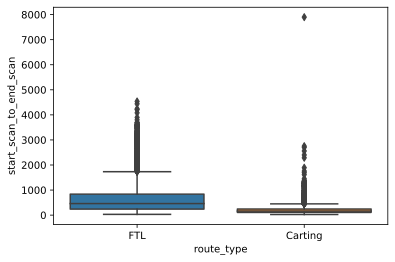

In [28]:
sns.boxplot(data=data,y='start_scan_to_end_scan',x='route_type')

<AxesSubplot:xlabel='route_type', ylabel='actual_distance_to_destination'>

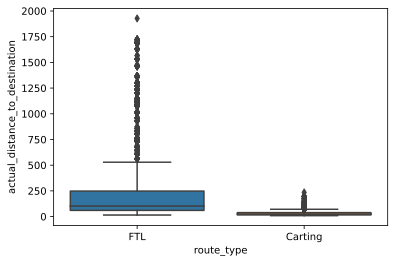

In [29]:
sns.boxplot(data=data,y='actual_distance_to_destination',x='route_type')

> There are a large number of number of outliers for distance and time columns for each trip . However, we need not to focus or treat these outliers as there can be short or long trips . Instead, we will treat, the time and distance differenced between actual and expected values.

> Before that, we will explore the aggreated value little more.

In [30]:
sns.scatterplot(data=data,x='actual_distance_to_destination',y='start_scan_to_end_scan',hue='route_type')

<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='start_scan_to_end_scan'>

> Here, we if see the distance vs time plot for each trip, for increase in distance, there in increase in time. However, there are points for the same distance which have multiple time values, That means, there has been significant time differences even though distance has been same.

> Also, we can see here that Carting distances are short distance trip. However, time taken is higher.

In [31]:
# travel time difference between expected and actual
data['travel_time_diff']=data['actual_time']-data['osrm_time']


# idle time of the trip
data['trip_idle_time']=data['start_scan_to_end_scan']-data['actual_time']

# difference in travelled distance and actual distance
data['trip_dist_diff']=data['actual_distance_to_destination']-data['osrm_distance']

data.head()

trip_creation_time route_type    Source_State  \
trip_uuid                                                                       
trip-153671041653548748 2018-09-12 00:00:16.535741        FTL  Madhya Pradesh   
trip-153671042288605164 2018-09-12 00:00:22.886430    Carting       Karnataka   
trip-153671043369099517 2018-09-12 00:00:33.691250        FTL       Karnataka   
trip-153671046011330457 2018-09-12 00:01:00.113710    Carting     Maharashtra   
trip-153671052974046625 2018-09-12 00:02:09.740725        FTL       Karnataka   

                        Destination_State  data              od_start_time  \
trip_uuid                                                                    
trip-153671041653548748           Haryana    39 2018-09-12 00:00:16.535741   
trip-153671042288605164         Karnataka     9 2018-09-12 00:00:22.886430   
trip-153671043369099517            Punjab    89 2018-09-12 00:00:33.691250   
trip-153671046011330457       Maharashtra     2 2018-09-12 00:01:00.113710   
trip-153671052974046625         Karnataka     7 2018-09-12 00:02:09.740725   

                                       od_end_time  start_scan_to_end_scan  \
trip_uuid                                                                    
trip-153671041653548748 2018-09-13 13:40:23.123744                  1260.0   
trip-153671042288605164 2018-09-12 03:01:59.598855                   122.0   
trip-153671043369099517 2018-09-14 17:34:55.442454                  3099.0   
trip-153671046011330457 2018-09-12 01:41:29.809822                   100.0   
trip-153671052974046625 2018-09-12 12:00:30.683231                   485.0   

                         actual_distance_to_destination  actual_time  \
trip_uuid                                                              
trip-153671041653548748                      440.973689        830.0   
trip-153671042288605164                       48.542890         96.0   
trip-153671043369099517                     1689.964663       2736.0   
trip-153671046011330457                       17.175274         59.0   
trip-153671052974046625                       59.530350        147.0   

                         osrm_distance  osrm_time  travel_time_diff  \
trip_uuid                                                             
trip-153671041653548748       544.8027      394.0             436.0   
trip-153671042288605164        56.9116       42.0              54.0   
trip-153671043369099517      2090.8743     1529.0            1207.0   
trip-153671046011330457        19.6800       15.0              44.0   
trip-153671052974046625        63.6461       46.0             101.0   

                         trip_idle_time  trip_dist_diff  
trip_uuid                                                
trip-153671041653548748           430.0     -103.829011  
trip-153671042288605164            26.0       -8.368710  
trip-153671043369099517           363.0     -400.909637  
trip-153671046011330457            41.0       -2.504726  
trip-153671052974046625           338.0       -4.115750

In [32]:
# Top 5 States with most orders
data_states=data.reset_index().groupby('Destination_State').count()
data_states.sort_values('trip_uuid',ascending=False).head(5)[['trip_uuid']]

trip_uuid
Destination_State           
Maharashtra             2591
Karnataka               2276
Haryana                 1664
Tamil Nadu              1072
Telangana                843

> Above is the list of top 5 states with most orders.

In [33]:
data.corr()

data  start_scan_to_end_scan  \
data                            1.000000                0.861702   
start_scan_to_end_scan          0.861702                1.000000   
actual_distance_to_destination  0.933208                0.914761   
actual_time                     0.890864                0.959048   
osrm_distance                   0.930430                0.918789   
osrm_time                       0.929338                0.918474   
travel_time_diff                0.789370                0.922065   
trip_idle_time                  0.216521                0.482556   
trip_dist_diff                 -0.864435               -0.883971   

                                actual_distance_to_destination  actual_time  \
data                                                  0.933208     0.890864   
start_scan_to_end_scan                                0.914761     0.959048   
actual_distance_to_destination                        1.000000     0.951329   
actual_time                                           0.951329     1.000000   
osrm_distance                                         0.997702     0.954850   
osrm_time                                             0.995847     0.954152   
travel_time_diff                                      0.839921     0.964560   
trip_idle_time                                        0.212504     0.214710   
trip_dist_diff                                       -0.929988    -0.915688   

                                osrm_distance  osrm_time  travel_time_diff  \
data                                 0.930430   0.929338          0.789370   
start_scan_to_end_scan               0.918789   0.918474          0.922065   
actual_distance_to_destination       0.997702   0.995847          0.839921   
actual_time                          0.954850   0.954152          0.964560   
osrm_distance                        1.000000   0.998812          0.843664   
osrm_time                            0.998812   1.000000          0.841357   
travel_time_diff                     0.843664   0.841357          1.000000   
trip_idle_time                       0.215503   0.216576          0.196777   
trip_dist_diff                      -0.952758  -0.954629         -0.811899   

                                trip_idle_time  trip_dist_diff  
data                                  0.216521       -0.864435  
start_scan_to_end_scan                0.482556       -0.883971  
actual_distance_to_destination        0.212504       -0.929988  
actual_time                           0.214710       -0.915688  
osrm_distance                         0.215503       -0.952758  
osrm_time                             0.216576       -0.954629  
travel_time_diff                      0.196777       -0.811899  
trip_idle_time                        1.000000       -0.216546  
trip_dist_diff                       -0.216546        1.000000

> The correlativity is higher for actual time taken for the trip with all parameters like distance, however, there less correlativity, but significant enough with idle time, which can be considered as warehouse time between the segments of a trip.

<AxesSubplot:xlabel='route_type', ylabel='travel_time_diff'>

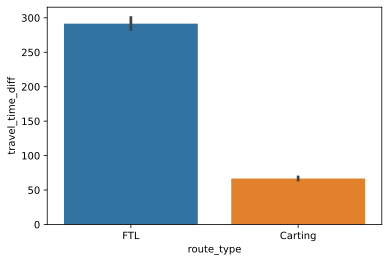

In [34]:
sns.barplot(data=data,y='travel_time_diff',x='route_type')

> In the above chart, we see that the Carting have lesser time travel difference from actual and expected values than FTL.

<AxesSubplot:xlabel='route_type', ylabel='trip_idle_time'>

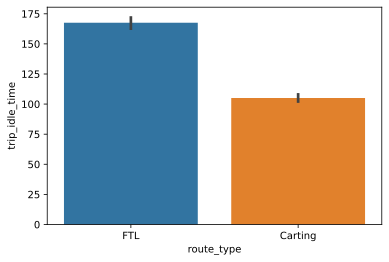

In [35]:
sns.barplot(data=data,y='trip_idle_time',x='route_type')

> Trip Idle time in warehouses during trip is higher for FTL than Carting route type, but considering the trip distance and time of Carting type lesser in compare to FTL, Carting has a huge idle time.

<AxesSubplot:xlabel='travel_time_diff', ylabel='trip_idle_time'>

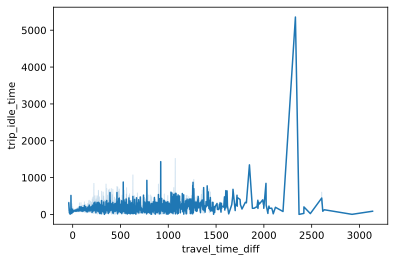

In [36]:
sns.lineplot(data=data,x='travel_time_diff',y='trip_idle_time')

> In order to estiblish a relationship between idle time and time loss, the above line chart doesn't show much from which we can infer something. We need to check correlativity.

<AxesSubplot:>

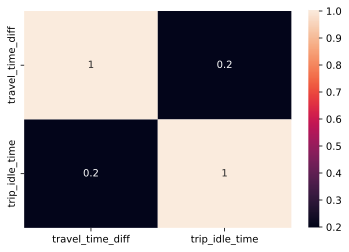

In [37]:
sns.heatmap(data[['travel_time_diff','trip_idle_time']].corr(),annot=True)

> The time idle time in warehouses between trips is somewhat related to the time loss in the delievery.

<AxesSubplot:>

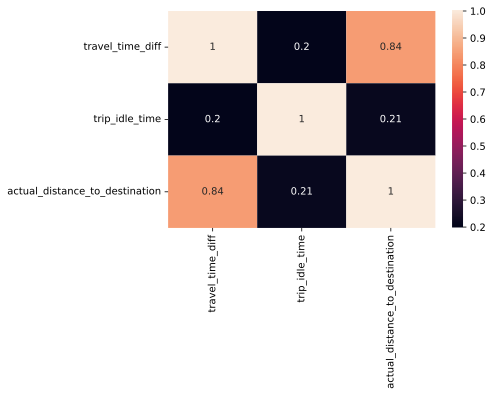

In [38]:
sns.heatmap(data[['travel_time_diff','trip_idle_time','actual_distance_to_destination']].corr(),annot=True)

> More the distance to trip , more the loss of time during delievery.

<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='trip_dist_diff'>

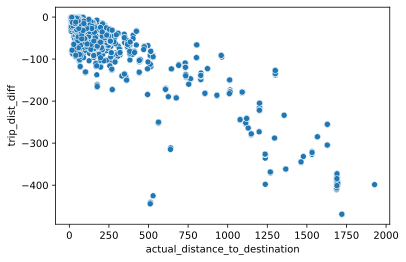

In [39]:
sns.scatterplot(data=data,x='actual_distance_to_destination',y='trip_dist_diff')

> There is negative relation between trip distance between actual & open source expected distance vs actual. That means, the open source distance values are higher than the actual distance.

<AxesSubplot:xlabel='route_type', ylabel='travel_time_diff'>

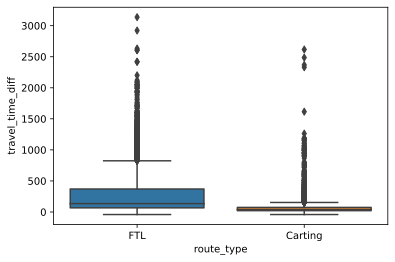

In [40]:
sns.boxplot(data=data,y='travel_time_diff',x='route_type')

In [41]:
data_FTL=data.loc[data['route_type']=='FTL']['travel_time_diff']
mean_time=round(data_FTL.mean(),2)

q1 = np.percentile(data_FTL, 0.25)
q3 = np.percentile(data_FTL, 0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

lower_limit,mean_time,upper_limit

(-65.39999999999999, 291.49, 44.199999999999996)

In [42]:
data_Carting=data.loc[data['route_type']=='Carting']['travel_time_diff']
mean_time=round(data_Carting.mean(),2)

q1 = np.percentile(data_Carting, 0.25)
q3 = np.percentile(data_Carting, 0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

lower_limit,mean_time,upper_limit

(-27.18124999999999, 66.71, 15.968749999999986)

> We see a hugh difference in lower & upper difference from calculation and the plot. Also, the number of outliers are huge, so, we cannot ingore them.

In [43]:
# Data Normalization

data2=data.drop(columns=['trip_creation_time','route_type','Source_State','Destination_State'])
def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

for col in data2.columns:
    data2[col] = min_max_scaling(data2[col])

data2.head()

data  od_start_time  od_end_time  \
trip_uuid                                                   
trip-153671041653548748  0.38       0.000000     0.058829   
trip-153671042288605164  0.08       0.000003     0.003508   
trip-153671043369099517  0.88       0.000009     0.103400   
trip-153671046011330457  0.01       0.000022     0.001366   
trip-153671052974046625  0.06       0.000057     0.017842   

                         start_scan_to_end_scan  \
trip_uuid                                         
trip-153671041653548748                0.157079   
trip-153671042288605164                0.012571   
trip-153671043369099517                0.390603   
trip-153671046011330457                0.009778   
trip-153671052974046625                0.058667   

                         actual_distance_to_destination  actual_time  \
trip_uuid                                                              
trip-153671041653548748                        0.225167     0.181517   
trip-153671042288605164                        0.020611     0.019235   
trip-153671043369099517                        0.876211     0.602918   
trip-153671046011330457                        0.004260     0.011055   
trip-153671052974046625                        0.026338     0.030511   

                         osrm_distance  osrm_time  travel_time_diff  \
trip_uuid                                                             
trip-153671041653548748       0.231204   0.230952          0.150094   
trip-153671042288605164       0.020646   0.021429          0.029893   
trip-153671043369099517       0.898441   0.906548          0.392700   
trip-153671046011330457       0.004578   0.005357          0.026746   
trip-153671052974046625       0.023552   0.023810          0.044682   

                         trip_idle_time  trip_dist_diff  
trip_uuid                                                
trip-153671041653548748        0.080269        0.778853  
trip-153671042288605164        0.004853        0.982199  
trip-153671043369099517        0.067762        0.146021  
trip-153671046011330457        0.007654        0.994691  
trip-153671052974046625        0.063095        0.991259

<AxesSubplot:xlabel='actual_distance_to_destination', ylabel='actual_time'>

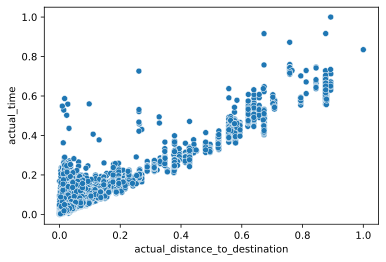

In [44]:
sns.scatterplot(data=data2,y='actual_time',x='actual_distance_to_destination')

> After normalization of data, the relation between the distance and time is more linear, with better separation of outliers.

### Business Insights 

> - There has been most delivery movement between Punjab (Chandigarh_Mehmdpur_H) & Karnataka (Bangalore_Nelmngla_H), which is 81.
> - Highest average distance travelled for the delievery is between Haryana (Gurgaon_Bilaspur_HB) & Tamil Nadu (MAA_Poonamallee_HB), which is 191.4 KMs
> - Highest average time travelled for the delievery is between Haryana (Gurgaon_Bilaspur_HB) & Tamil Nadu (MAA_Poonamallee_HB), which is 3051 hrs
> - Most delivery delays are observed between Himachal Pradesh (Dalhousie_Banikhet_D) & Himachal Pradesh (Chamba_Bangotu_D), which is 2418 hrs
> - Maharahtra state has highest number of trips for the delievery, which is 2591
> - The Carting route type have lesser time travel difference from actual and expected values than FTL.
> - Trip Idle time in warehouses during trip is higher for FTL than Carting route type, but considering the trip distance and time of Carting type lesser in compare to FTL, Carting has a huge idle time.
> - The time idle time in warehouses between trips is somewhat related to the time loss in the delievery.
> - More the distance to trip , more the loss of time during delievery.
> - The open source distance values are higher than the actual distance.

### Recommendations

> - Reduce warehouse idle time for quick delivery
> - use better source for getting estimated distance between 2 points
> - calculate better the expected time for delivery
> - reduce time travel difference by using FTL route type for longer trips
> - consider weather, traffic and states for delivery vehicles clearance